### Task How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

##### Note : Use KNN for Classification.

In [168]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

In [169]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [170]:
wine.shape

(6497, 13)

In [171]:
# Checking for duplicated data
wine.duplicated().sum()

1168

In [172]:
wine.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [173]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [174]:
# Drop rows with missing values
wine = wine.dropna()

# Dropping Duplicates rows
wine.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine.shape)

Wine Data Shape (After Dropping-) : (5295, 13)


In [175]:
X = wine.drop(columns="type")
y = wine["type"]

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [177]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [179]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [180]:
y_pred = knn.predict(X_test_scaled)

In [181]:
accuracy_score(y_test,y_pred)

0.9933899905571294

### Performing PCA

In [182]:
from sklearn.decomposition import PCA

In [183]:
pca = PCA(n_components=None)
X_train_trf0 = pca.fit_transform(X_train_scaled)
X_test_trf0 = pca.transform(X_test_scaled)

In [184]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_trf0,y_train)

KNeighborsClassifier()

In [185]:
y_pred_trf0 = knn.predict(X_test_trf0)

In [186]:
accuracy_score(y_test,y_pred_trf0)

0.9933899905571294

In [187]:
pca.components_.shape

(12, 12)

In [188]:
pca.explained_variance_

array([3.04132576, 2.64834255, 1.65135526, 1.07374019, 0.84749993,
       0.65586505, 0.54230837, 0.50921118, 0.47275041, 0.30178467,
       0.22349929, 0.03515086])

In [189]:
percent_var = pca.explained_variance_ratio_

In [190]:
np.cumsum(percent_var)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156, 0.95330812, 0.97845091,
       0.99707145, 1.        ])

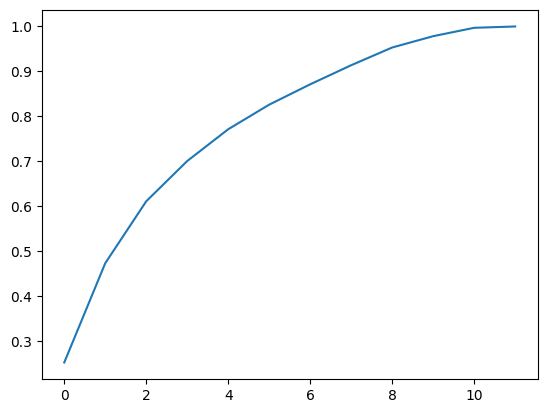

In [191]:
plt.plot(np.cumsum(percent_var))

In [118]:
# from above graph we can say 90% variance explained with 8 principle components

### Find accuracy with Principle Components

In [196]:
for i in range(1,X_train.shape[1]):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_scaled)
    X_test_trf = pca.transform(X_test_scaled)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_trf,y_train)
    y_pred_trf = knn.predict(X_test_trf)
    print(i,accuracy_score(y_test,y_pred_trf))
    

1 0.9754485363550519
2 0.9763928234183191
3 0.9754485363550519
4 0.9858356940509915
5 0.9886685552407932
6 0.9886685552407932
7 0.9905571293673276
8 0.9933899905571294
9 0.9924457034938622
10 0.9924457034938622
11 0.9924457034938622


In [194]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_pca,y_train)
y_pred_pca = knn1.predict(X_test_pca)

In [195]:
accuracy_score(y_test, y_pred_pca)

0.9754485363550519

In [197]:
# Apply PCA on the standardized features
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 98.87%
